In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

In [ ]:
data_dir = "/content/drive/MyDrive/new_garbage_classification"

Data preprocessing

In [ ]:
batch_size = 32
img_height = 224
img_width = 224
num_classes = 6

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4272 images belonging to 6 classes.
Found 1068 images belonging to 6 classes.


##Efficinet Net BO

In [ ]:
model_url = 'https://tfhub.dev/google/efficientnet/b0/feature-vector/1'
base_model = hub.KerasLayer(model_url, trainable=False)

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
134/134 [==============================] - 740s 6s/step - loss: 0.2391 - accuracy: 0.9408 - val_loss: 0.2101 - val_accuracy: 0.9373
Epoch 2/10
134/134 [==============================] - 81s 607ms/step - loss: 0.1667 - accuracy: 0.9576 - val_loss: 0.1751 - val_accuracy: 0.9401
Epoch 3/10
134/134 [==============================] - 80s 596ms/step - loss: 0.1306 - accuracy: 0.9661 - val_loss: 0.1571 - val_accuracy: 0.9494
Epoch 4/10
134/134 [==============================] - 80s 600ms/step - loss: 0.1104 - accuracy: 0.9731 - val_loss: 0.1443 - val_accuracy: 0.9579
Epoch 5/10
134/134 [==============================] - 79s 593ms/step - loss: 0.0954 - accuracy: 0.9766 - val_loss: 0.1435 - val_accuracy: 0.9597
Epoch 6/10
134/134 [==============================] - 81s 606ms/step - loss: 0.0838 - accuracy: 0.9796 - val_loss: 0.1442 - val_accuracy: 0.9551
Epoch 7/10
134/134 [==============================] - 79s 590ms/step - loss: 0.0751 - accuracy: 0.9820 - val_loss: 0.1230 - val_accu

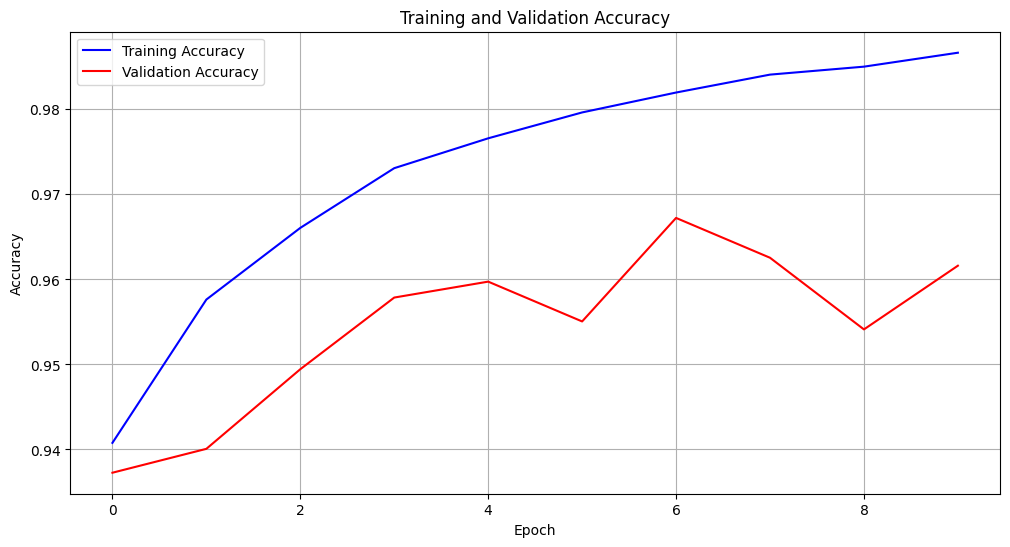

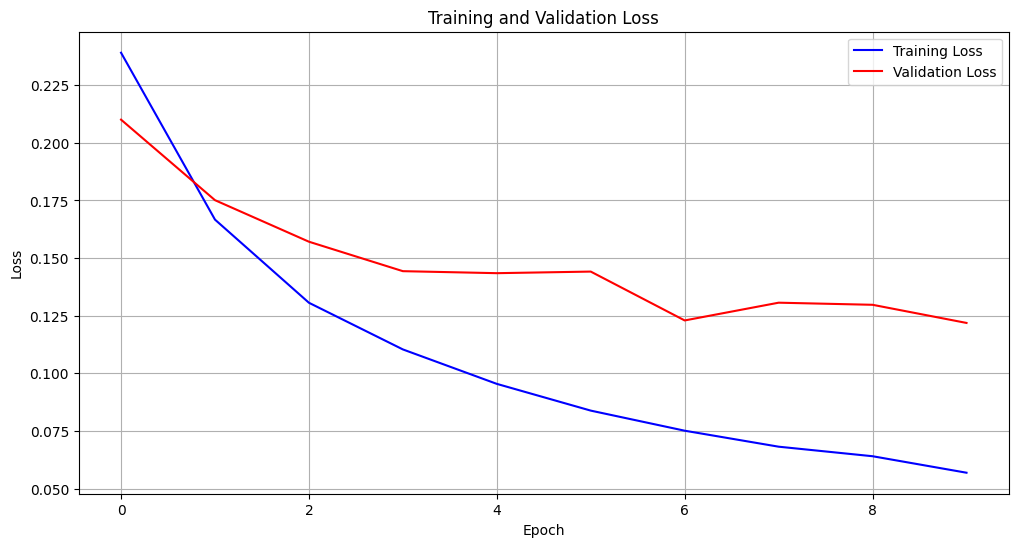

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()